In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/stsdataset.zip" -d "/content/dataset"

Archive:  /content/drive/MyDrive/stsdataset.zip
  inflating: /content/dataset/dataset/A-samples/0.jpg  
  inflating: /content/dataset/dataset/A-samples/1.jpg  
  inflating: /content/dataset/dataset/A-samples/10.jpg  
  inflating: /content/dataset/dataset/A-samples/100.jpg  
  inflating: /content/dataset/dataset/A-samples/11.jpg  
  inflating: /content/dataset/dataset/A-samples/12.jpg  
  inflating: /content/dataset/dataset/A-samples/13.jpg  
  inflating: /content/dataset/dataset/A-samples/14.jpg  
  inflating: /content/dataset/dataset/A-samples/15.jpg  
  inflating: /content/dataset/dataset/A-samples/16.jpg  
  inflating: /content/dataset/dataset/A-samples/17.jpg  
  inflating: /content/dataset/dataset/A-samples/18.jpg  
  inflating: /content/dataset/dataset/A-samples/19.jpg  
  inflating: /content/dataset/dataset/A-samples/2.jpg  
  inflating: /content/dataset/dataset/A-samples/20.jpg  
  inflating: /content/dataset/dataset/A-samples/21.jpg  
  inflating: /content/dataset/dataset/A-sa

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

# Set dataset path and parameters
dataset_path = '/content/dataset/dataset'
image_size = (224, 224)

# Define class labels (A-Y, excluding J and Z)
class_names = [chr(i) for i in range(ord('A'), ord('Z') + 1) if chr(i) not in ['J', 'Z']]
class_mapping = {class_name: idx for idx, class_name in enumerate(class_names)}

def load_and_preprocess_data(dataset_path, image_size):
    images = []
    labels = []

    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)

        if folder_name in class_mapping and os.path.isdir(folder_path):
            class_label = class_mapping[folder_name]

            for subfolder_name in os.listdir(folder_path):
                subfolder_path = os.path.join(folder_path, subfolder_name)

                if os.path.isdir(subfolder_path):
                    for image_name in os.listdir(subfolder_path):
                        if image_name.endswith(('.png', '.jpg', '.jpeg')):
                            image_path = os.path.join(subfolder_path, image_name)
                            img = cv2.imread(image_path)
                            if img is not None:
                                img = cv2.resize(img, image_size)
                                img = img.astype('float32') / 255.0
                                images.append(img)
                                labels.append(class_label)

    images = np.array(images)
    labels = np.array(labels)
    labels = to_categorical(labels, num_classes=len(class_names))  # One-hot encoding
    return images, labels

# Run preprocessing
images, labels = load_and_preprocess_data(dataset_path, image_size)
print(f"Processed Images shape: {images.shape}")
print(f"Processed Labels shape: {labels.shape}")


Processed Images shape: (0,)
Processed Labels shape: (0, 24)


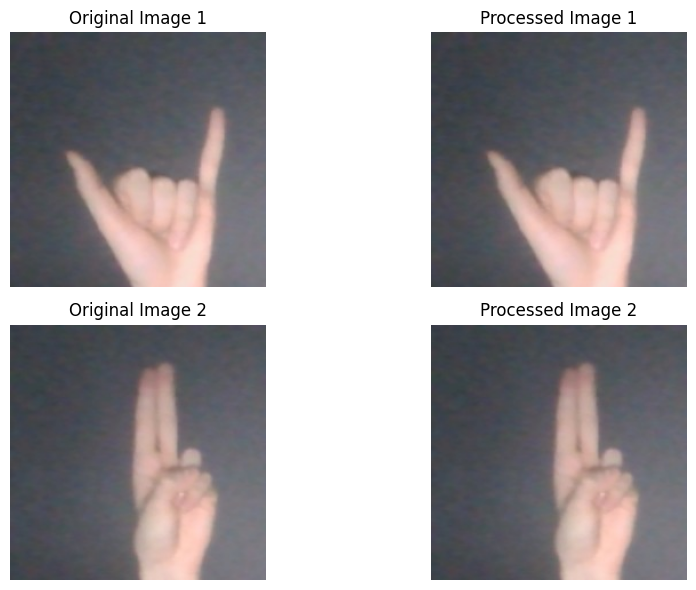

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import numpy as np

# Dataset path and target size
dataset_path = '/content/dataset/dataset'
image_size = (224, 224)

# Collect all image paths
all_image_paths = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            all_image_paths.append(os.path.join(root, file))

# Randomly select 2 images
selected_paths = random.sample(all_image_paths, 2)

# Function to preprocess image
def preprocess_image(image_path, image_size):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, image_size)
    img_normalized = img_resized.astype('float32') / 255.0
    return img, img_normalized

# Plotting before and after preprocessing
plt.figure(figsize=(10, 6))
for i, path in enumerate(selected_paths):
    original_img, processed_img = preprocess_image(path, image_size)

    # Convert BGR to RGB for display
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    processed_img_disp = (processed_img * 255).astype('uint8')  # Rescale for display
    processed_img_disp = cv2.cvtColor(processed_img_disp, cv2.COLOR_BGR2RGB)

    # Display original
    plt.subplot(2, 2, i * 2 + 1)
    plt.imshow(original_img)
    plt.title(f'Original Image {i+1}')
    plt.axis('off')

    # Display processed
    plt.subplot(2, 2, i * 2 + 2)
    plt.imshow(processed_img_disp)
    plt.title(f'Processed Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import cv2
import os

dataset_path = '/content/dataset/dataset'
image_size = (224, 224)

def load_and_preprocess_data(dataset_path, image_size):
    images = []

    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)

        if os.path.isdir(folder_path):
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)

                if image_name.endswith(('.png', '.jpg', '.jpeg')):
                    print(f"Found image: {image_name} in folder: {folder_name}")
                    img = cv2.imread(image_path)
                    if img is not None:
                        img = cv2.resize(img, image_size)
                        img = img.astype('float32') / 255.0
                        images.append(img)
                    else:
                        print(f"Error reading image: {image_path}")

    images = np.array(images)
    return images

images = load_and_preprocess_data(dataset_path, image_size)
print(f"Images shape before PCA: {images.shape}")

if images.size > 0:
    images_flat = images.reshape(images.shape[0], -1)
    pca = PCA(n_components=100)
    images_reduced = pca.fit_transform(images_flat)
    print(f"Shape of images after PCA: {images_reduced.shape}")
else:
    print("No images were loaded. Please check the dataset path and file structure.")


Found image: 74.jpg in folder: D-samples
Found image: 18.jpg in folder: D-samples
Found image: 1.jpg in folder: D-samples
Found image: 36.jpg in folder: D-samples
Found image: 10.jpg in folder: D-samples
Found image: 34.jpg in folder: D-samples
Found image: 96.jpg in folder: D-samples
Found image: 20.jpg in folder: D-samples
Found image: 33.jpg in folder: D-samples
Found image: 85.jpg in folder: D-samples
Found image: 100.jpg in folder: D-samples
Found image: 101.jpg in folder: D-samples
Found image: 50.jpg in folder: D-samples
Found image: 30.jpg in folder: D-samples
Found image: 55.jpg in folder: D-samples
Found image: 22.jpg in folder: D-samples
Found image: 51.jpg in folder: D-samples
Found image: 62.jpg in folder: D-samples
Found image: 15.jpg in folder: D-samples
Found image: 7.jpg in folder: D-samples
Found image: 47.jpg in folder: D-samples
Found image: 26.jpg in folder: D-samples
Found image: 29.jpg in folder: D-samples
Found image: 25.jpg in folder: D-samples
Found image: 80.

In [ ]:
import numpy as np
import cv2
import os

dataset_path = '/content/dataset/dataset'
image_size = (224, 224)

def load_and_preprocess_data(dataset_path, image_size):
    images = []
    labels = []
    class_counts = {}

    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)

        if os.path.isdir(folder_path):
            class_counts[folder_name] = 0

            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)

                if image_name.endswith(('.png', '.jpg', '.jpeg')):
                    print(f"Found image: {image_name} in folder: {folder_name}")
                    img = cv2.imread(image_path)
                    if img is not None:
                        img = cv2.resize(img, image_size)
                        img = img.astype('float32') / 255.0
                        images.append(img)
                        labels.append(folder_name)
                        class_counts[folder_name] += 1
                    else:
                        print(f"Error reading image: {image_path}")

    images = np.array(images)
    labels = np.array(labels)
    return images, labels, class_counts

images, labels, class_counts = load_and_preprocess_data(dataset_path, image_size)

print("\nClass distribution (number of samples per class):")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} samples")



Found image: 74.jpg in folder: D-samples
Found image: 18.jpg in folder: D-samples
Found image: 1.jpg in folder: D-samples
Found image: 36.jpg in folder: D-samples
Found image: 10.jpg in folder: D-samples
Found image: 34.jpg in folder: D-samples
Found image: 96.jpg in folder: D-samples
Found image: 20.jpg in folder: D-samples
Found image: 33.jpg in folder: D-samples
Found image: 85.jpg in folder: D-samples
Found image: 100.jpg in folder: D-samples
Found image: 101.jpg in folder: D-samples
Found image: 50.jpg in folder: D-samples
Found image: 30.jpg in folder: D-samples
Found image: 55.jpg in folder: D-samples
Found image: 22.jpg in folder: D-samples
Found image: 51.jpg in folder: D-samples
Found image: 62.jpg in folder: D-samples
Found image: 15.jpg in folder: D-samples
Found image: 7.jpg in folder: D-samples
Found image: 47.jpg in folder: D-samples
Found image: 26.jpg in folder: D-samples
Found image: 29.jpg in folder: D-samples
Found image: 25.jpg in folder: D-samples
Found image: 80.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features from images
features = feature_extractor.predict(images)
print(f"Feature shape before flattening: {features.shape}")

# Flatten features for ML models
features_flattened = features.reshape(features.shape[0], -1)  # Convert to 1D
print(f"Feature shape after flattening: {features_flattened.shape}")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 1510s 20s/step
Feature shape before flattening: (2427, 7, 7, 512)
Feature shape after flattening: (2427, 25088)


In [ ]:
# Print some sample labels to verify
if 'labels' in locals():
    print(f"Sample Labels: {labels[:5]}")
    print(f"Total Labels: {len(labels)}")
else:
    print("Error: 'labels' variable not found. Check dataset loading function.")


Sample Labels: ['D-samples' 'D-samples' 'D-samples' 'D-samples' 'D-samples']
Total Labels: 2427


In [ ]:
cleaned_labels = [label.split("-")[0] for label in labels]  # Extract only the letter
labels = np.array(cleaned_labels)  # Convert back to NumPy array

# Print cleaned labels
print(f"Cleaned Labels: {labels[:5]}")

Cleaned Labels: ['D' 'D' 'D' 'D' 'D']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the cleaned labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Print encoded labels
print(f"Encoded Labels: {labels_encoded[:5]}")  # Should now be numeric
print(f"Total Unique Classes: {len(label_encoder.classes_)}")  # Should be 24 (A-Y excluding J, Z)

Encoded Labels: [3 3 3 3 3]
Total Unique Classes: 24


In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_flattened, labels_encoded, test_size=0.2, random_state=42)

print(f"Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")


Training Samples: 1941, Testing Samples: 486


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_flattened, labels_encoded, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=20,
    max_depth=5,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Decision Tree Accuracy: 0.8415637860082305
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       1.00      0.92      0.96        12
           2       0.86      0.82      0.84        22
           3       0.79      0.88      0.83        17
           4       0.79      0.79      0.79        24
           5       0.93      0.78      0.85        32
           6       0.78      0.93      0.85        15
           7       0.87      0.95      0.91        21
           8       0.87      0.74      0.80        27
           9       0.82      0.95      0.88        19
          10       0.88      1.00      0.94        15
          11       0.89      0.70      0.78        23
          12       0.86      0.64      0.73        28
          13       0.93      0.93      0.93        14
          14       0.91      0.67      0.77        15
          15       0.85      0.89      0.87        19
          16       0.69      0.73     

In [ ]:
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import time
from sklearn.metrics import accuracy_score, classification_report

# Step 1: PCA with fewer components
pca = PCA(n_components=50)  # Reduced from 100 to 50
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 2: XGBoost with slightly downgraded settings
xgb_model = XGBClassifier(
    eval_metric='mlogloss',
    n_estimators=20,         # Fewer trees
    max_depth=4,             # Shallower trees
    learning_rate=0.3,       # Higher learning rate
    reg_alpha=0.5,           # Add L1 regularization
    reg_lambda=1.0,          # Add L2 regularization
    n_jobs=-1,
    random_state=42
)

# Step 3: Training
start_time = time.time()
xgb_model.fit(X_train_pca, y_train)
end_time = time.time()

print(f"✅ XGBoost Training Time (CPU): {end_time - start_time:.2f} seconds")

# Step 4: Evaluate
y_pred = xgb_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"🎯 XGBoost Model Accuracy: {accuracy:.4f}")
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))


✅ XGBoost Training Time (CPU): 1.76 seconds
🎯 XGBoost Model Accuracy: 0.9671

🔍 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        22
           3       0.94      1.00      0.97        17
           4       0.92      0.96      0.94        24
           5       1.00      1.00      1.00        32
           6       0.93      0.87      0.90        15
           7       1.00      0.95      0.98        21
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        15
          11       0.88      0.91      0.89        23
          12       1.00      0.75      0.86        28
          13       1.00      1.00      1.00        14
          14       0.88      1.00      0.94        15
          15       1.00      0.9

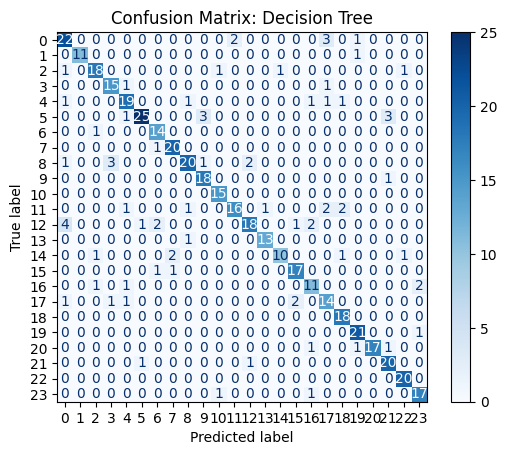

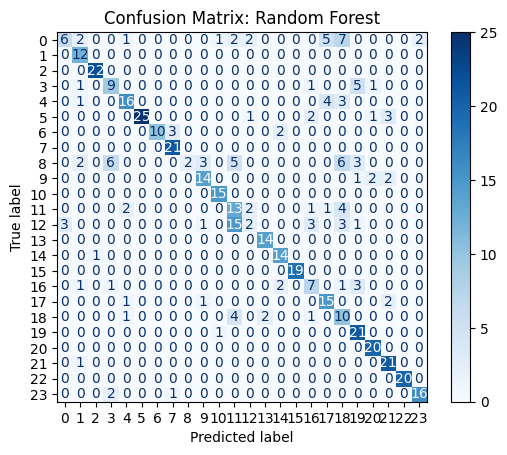

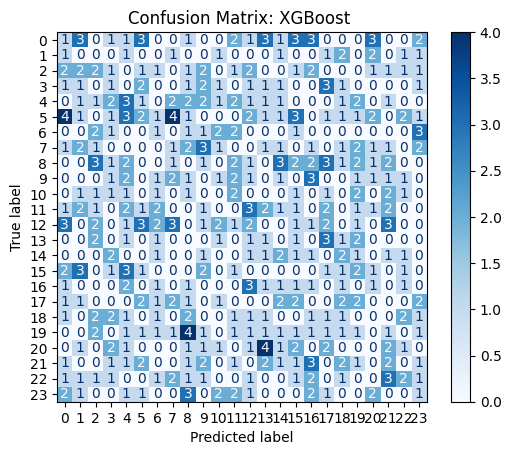

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {title}")
    plt.grid(False)
    plt.show()

# 👉 Use these if your models are already trained and predictions are done

# Decision Tree
plot_conf_matrix(y_test, dt_preds, "Decision Tree")

# Random Forest
plot_conf_matrix(y_test, rf_preds, "Random Forest")

y_test_trimmed = y_test[:len(y_pred)]
cm = confusion_matrix(y_test_trimmed, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: XGBoost ")
plt.grid(False)
plt.show()




In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 🧠 Get metrics from predictions
def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    }

# 📊 Build comparison dictionary
results = {
    'Decision Tree': get_metrics(y_test, dt_preds),
    'Random Forest': get_metrics(y_test, rf_preds),
    'XGBoost': get_metrics(y_test, y_pred)  # y_pred is for XGBoost
}

# 📋 Convert to DataFrame
comparison_df = pd.DataFrame(results).T.reset_index()
comparison_df.rename(columns={'index': 'Model'}, inplace=True)

# 🖨️ Display table
print("✅ Model Performance Comparison Table:\n")
print(comparison_df.to_string(index=False))


✅ Model Performance Comparison Table:

        Model  Accuracy  Precision   Recall  F1-Score
Decision Tree  0.841564   0.847216 0.841564  0.839831
Random Forest  0.707819   0.737639 0.707819  0.680130
      XGBoost  0.967078   0.969965 0.967078  0.966701


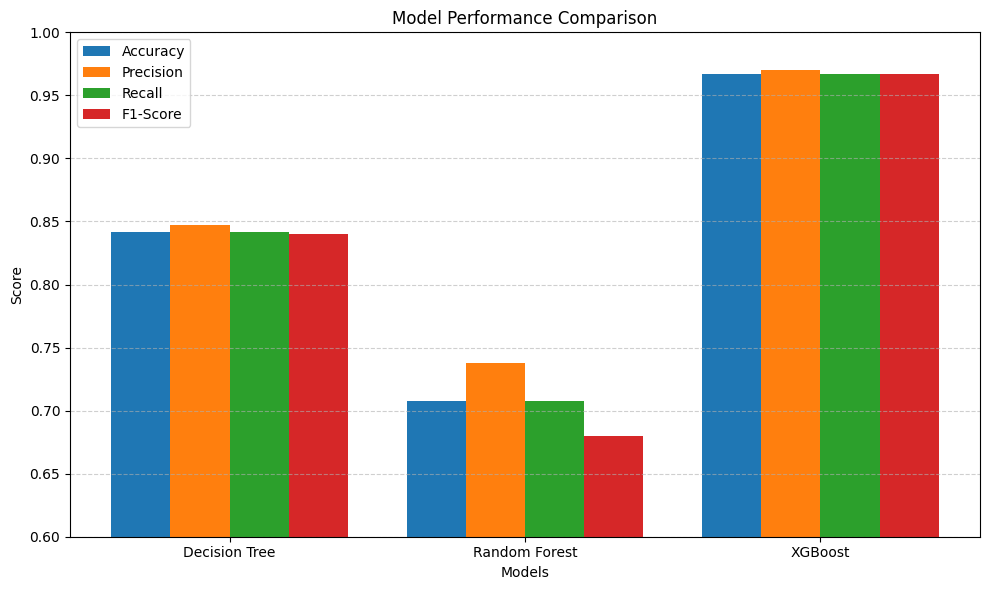

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Manually enter your results for full control
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.841564, 0.707819, 0.967078],
    'Precision': [0.847216, 0.737639, 0.969965],
    'Recall': [0.841564, 0.707819, 0.967078],
    'F1-Score': [0.839831, 0.680130, 0.966701]
})

# Bar Plot Setup
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(comparison_df['Model']))  # [0, 1, 2]
width = 0.2  # Width of each bar group

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric with offset
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, comparison_df[metric], width, label=metric)

# Labels and formatting
ax.set_title('Model Performance Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(comparison_df['Model'])
ax.set_ylim(0.6, 1.0)  # Adjust as needed
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Found 2427 files belonging to 24 classes.
Using 1942 files for training.
Found 2427 files belonging to 24 classes.
Using 485 files for validation.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.1353 - loss: 3.8930 - val_accuracy: 0.0495 - val_loss: 3.4178
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.3889 - loss: 2.0697 - val_accuracy: 0.0412 - val_loss: 3.9057
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6301 - loss: 1.3130 - val_accuracy: 0.0474 - val_loss: 3.9997
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.7911 - loss: 0.7696 - val_accuracy: 0.1134 - val_loss: 3.8157
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8723 - loss: 0.4504 - val_accuracy: 0.1670 - val_loss: 3.5086
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.9515 - loss: 0.2228 - val_accuracy: 0.2784 - val_loss: 2.7517
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9592 - loss: 0.1664 - val_accuracy: 0.3897 - val_loss: 2.0641
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9771 - loss: 0.1048 - val_accuracy: 0.6433 - val_loss: 1.

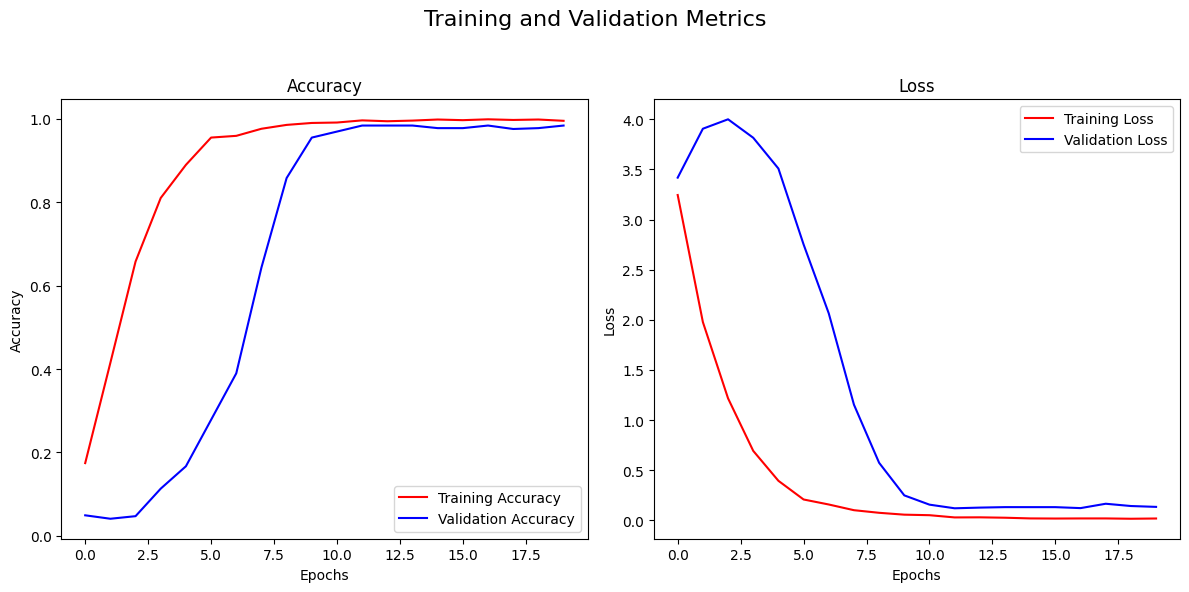

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

# Step 1: Load Dataset
dataset_path = '/content/dataset/dataset'

# List of class names (excluding 'J' and 'Z')
classes = ['A-samples', 'B-samples', 'C-samples', 'D-samples', 'E-samples', 'F-samples',
           'G-samples', 'H-samples', 'I-samples', 'K-samples', 'L-samples', 'M-samples',
           'N-samples', 'O-samples', 'P-samples', 'Q-samples', 'R-samples', 'S-samples',
           'T-samples', 'U-samples', 'V-samples', 'W-samples', 'X-samples', 'Y-samples']

# Image size for better feature extraction
IMG_SIZE = (128, 128)

# Load training and validation datasets
train_dataset = image_dataset_from_directory(
    directory=dataset_path,
    labels='inferred',
    label_mode='int',
    class_names=classes,
    image_size=IMG_SIZE,
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=123
)

val_dataset = image_dataset_from_directory(
    directory=dataset_path,
    labels='inferred',
    label_mode='int',
    class_names=classes,
    image_size=IMG_SIZE,
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=123
)

# Normalize images (scale pixel values between 0 and 1)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Cache and prefetch for performance optimization
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Step 2: Improved CNN Model
def build_improved_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.3),  # Prevent overfitting
        Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
    ])
    return model

# Number of classes
num_classes = len(classes)

# Create the model
cnn_model = build_improved_cnn(input_shape=(128, 128, 3), num_classes=num_classes)

# Step 3: Compile the Model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Step 4: Train the Model
history = cnn_model.fit(train_dataset, validation_data=val_dataset, epochs=20)

# Step 5: Save the Model
cnn_model.save("improved_cnn_model.h5")

# Plot training & validation metrics
import matplotlib.pyplot as plt

def plot_training_history(history, title='Training and Validation Metrics'):
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(title, fontsize=16)

    ax[0].plot(epochs, acc, 'r', label='Training Accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation Accuracy')
    ax[0].set_title('Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'r', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot the training history
plot_training_history(history)


In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         6,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,466,634 (97.15 MB)

 Trainable params: 8,488,728 (32.38 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 16,977,458 (64.76 MB)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.concatenate([y for x, y in val_dataset], axis=0)
def compute_metrics(y_true, y_pred):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (Macro)': precision_score(y_true, y_pred, average='macro'),
        'Recall (Macro)': recall_score(y_true, y_pred, average='macro'),
        'F1-Score (Macro)': f1_score(y_true, y_pred, average='macro'),
        'Precision (Micro)': precision_score(y_true, y_pred, average='micro'),
        'Recall (Micro)': recall_score(y_true, y_pred, average='micro'),
        'F1-Score (Micro)': f1_score(y_true, y_pred, average='micro')
    }
    return metrics

# Compute and display metrics
metrics = compute_metrics(y_true, y_pred)

print("\n--- Basic CNN Metrics ---")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")





--- Basic CNN Metrics ---
Accuracy: 0.9835
Precision (Macro): 0.9856
Recall (Macro): 0.9847
F1-Score (Macro): 0.9841
Precision (Micro): 0.9835
Recall (Micro): 0.9835
F1-Score (Micro): 0.9835


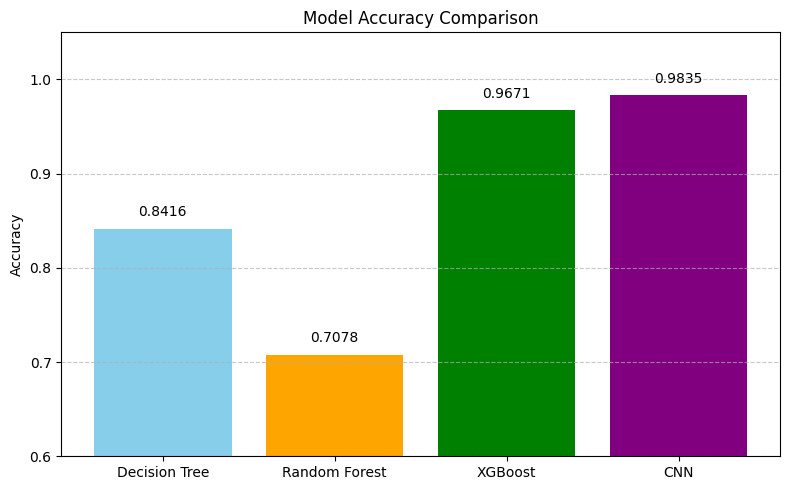

In [ ]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'CNN']
accuracies = [0.841564, 0.707819, 0.967078, 0.9835]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'orange', 'green', 'purple'])

# Annotate bars with accuracy values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01, f'{height:.4f}',
             ha='center', va='bottom', fontsize=10)

plt.ylim(0.6, 1.05)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

# Load dataset
dataset_path = '/content/dataset'
image_size = (64, 64)  # Use a reasonable size
batch_size = 32
num_classes = 24  # Your dataset has 24 classes

# Load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    label_mode='int',
    image_size=image_size,
    batch_size=batch_size
)

# Normalize images
normalization_layer = tf.keras.layers.Rescaling(1./255)
dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

# Convert dataset to NumPy arrays for k-fold splitting
X = np.concatenate([x.numpy() for x, y in dataset], axis=0)
y = np.concatenate([y.numpy() for x, y in dataset], axis=0)

# Define CNN model function
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Implement k-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

acc_per_fold = []
loss_per_fold = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"\nTraining on Fold {fold+1}/{k}...\n")

    # Split the dataset
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Convert to TensorFlow dataset
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size)

    # Create a new model for each fold
    model = create_model()

    # Train the model
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=10, verbose=1)

    # Evaluate on validation set
    scores = model.evaluate(val_dataset, verbose=0)
    print(f"Fold {fold+1} - Loss: {scores[0]} - Accuracy: {scores[1]}")

    acc_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])

# Print Final Cross-Validation Results
print(f"\nAverage Accuracy: {np.mean(acc_per_fold)} ± {np.std(acc_per_fold)}")
print(f"Average Loss: {np.mean(loss_per_fold)} ± {np.std(loss_per_fold)}")


Found 2427 files belonging to 1 classes.

Training on Fold 1/5...

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 279ms/step - accuracy: 0.9240 - loss: 0.3572 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 196ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 195ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - a

In [ ]:
model.save("sign_language_model.h5")


In [ ]:
!pip install mediapipe


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.6 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is inco

In [ ]:
import mediapipe as mp


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model

# Load CNN Model
model = load_model("sign_language_model.h5")
class_labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y"]  # Sign classes

# Initialize Mediapipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mp_draw = mp.solutions.drawing_utils

# Start Webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(frame_rgb)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            mp_draw.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Extract Hand Region
            x_min = min([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1]
            y_min = min([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0]
            x_max = max([lm.x for lm in hand_landmarks.landmark]) * frame.shape[1]
            y_max = max([lm.y for lm in hand_landmarks.landmark]) * frame.shape[0]

            # Crop & Preprocess Hand Image
            hand_img = frame[int(y_min):int(y_max), int(x_min):int(x_max)]
            hand_img = cv2.resize(hand_img, (64, 64)) / 255.0  # Resize & Normalize
            hand_img = np.expand_dims(hand_img, axis=0)

            # Predict Sign
            prediction = model.predict(hand_img)
            predicted_label = class_labels[np.argmax(prediction)]

            # Display Prediction
            cv2.putText(frame, f"Sign: {predicted_label}", (50, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Sign Language Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
!pip install gtts


In [ ]:
from gtts import gTTS


In [ ]:
from gtts import gTTS
from IPython.display import Audio

def text_to_speech(text):
    tts = gTTS(text=text, lang="en")
    tts.save("output.mp3")
    return Audio("output.mp3", autoplay=True)

# Example:
recognized_text = "Hello"
text_to_speech(recognized_text)

